# CO543 - Image Processing
## Lab 04 - Part 2 using CNN

- E/19/129
- K. H. Gunawardana


In [1]:
import os
from google.colab import drive

path = "/content/drive/My Drive/ML/CO543/lab04/"

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [3]:
train_df = pd.read_csv(path + "fashion-mnist_train.csv")
test_df = pd.read_csv(path + "fashion-mnist_test.csv")

In [4]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

X_train = train_df.iloc[:, 1:].values.astype("float32") / 255.0
y_train = train_df["label"].values.astype("int32")
X_test = test_df.iloc[:, 1:].values.astype("float32") / 255.0
y_test = test_df["label"].values.astype("int32")


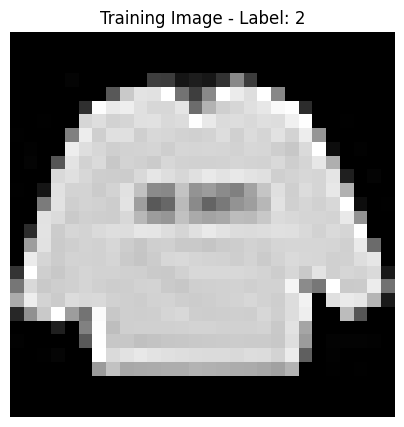

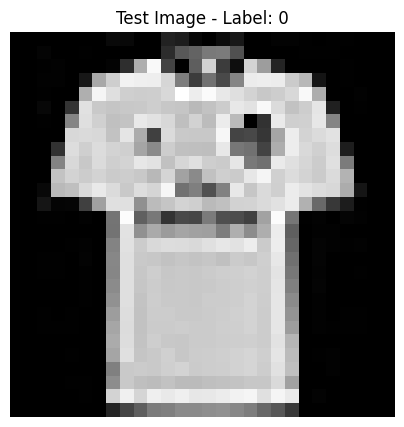

In [30]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Plot the first image in the training set
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Training Image - Label: {y_train[0]}')
plt.axis('off')
plt.show()

# Plot the first image in the test set
plt.figure(figsize=(5, 5))
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Test Image - Label: {y_test[0]}')
plt.axis('off')
plt.show()

In [31]:
X_train.shape

(60000, 28, 28, 1)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [33]:
model = keras.models.Sequential([

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * 0.1

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

learning_rate_scheduler = LearningRateScheduler(scheduler)

In [36]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[learning_rate_scheduler], batch_size=64)

Epoch 1/15
750/750 [==============================] - 226s 299ms/step - loss: 0.5070 - accuracy: 0.8229 - val_loss: 0.3168 - val_accuracy: 0.8872 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 218s 291ms/step - loss: 0.3198 - accuracy: 0.8859 - val_loss: 0.2576 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 232s 309ms/step - loss: 0.2789 - accuracy: 0.8991 - val_loss: 0.2412 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 235s 313ms/step - loss: 0.2543 - accuracy: 0.9080 - val_loss: 0.2166 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 222s 296ms/step - loss: 0.2316 - accuracy: 0.9160 - val_loss: 0.2092 - val_accuracy: 0.9227 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 223s 298ms/step - loss: 0.1896 - accuracy: 0.9310 - val_loss: 0.1876 - val_accuracy: 0.9303 - lr: 1.0000e-04
Epoch 7/15
750/750 [======================

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 12s 37ms/step - loss: 0.1858 - accuracy: 0.9312
Test accuracy: 0.9312000274658203


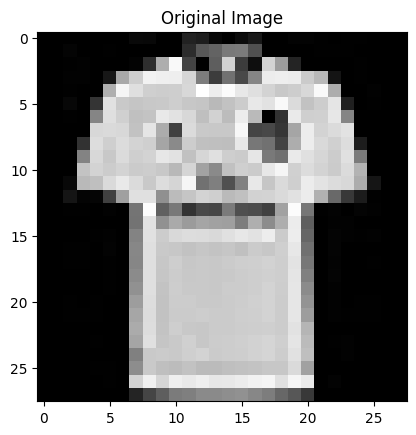

1/1 [==============================] - 0s 104ms/step


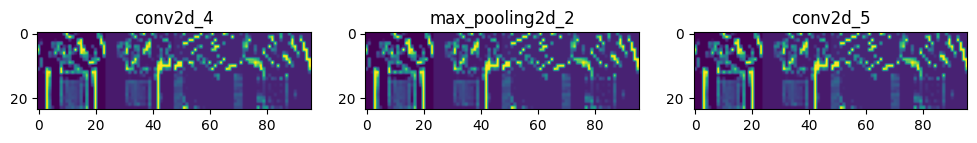

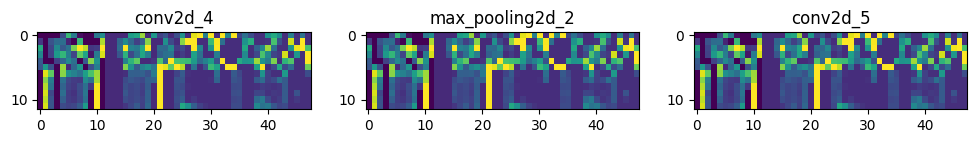

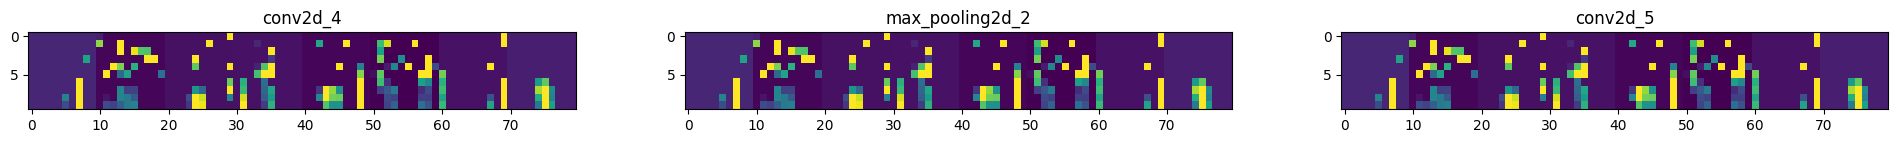

In [47]:
# Function to visualize the activations
def visualize_activations(layer_indices, image):
    layer_outputs = [layer.output for layer in model.layers[:max(layer_indices) + 1]]
    activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(image.reshape(1, 28, 28, 1))

    layer_names = [layer.name for layer in model.layers[:max(layer_indices) + 1]]

    for layer_index in layer_indices:
        activation = activations[layer_index]
        n_features = activation.shape[-1]
        size = activation.shape[1]
        n_cols = n_features // 16
        display_grid = np.zeros((size, size * n_cols))

        for col in range(n_cols):
            channel_image = activation[0, :, :, col]
            channel_image -= channel_image.mean()
            if channel_image.std() > 0:
                channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[:, col * size : (col + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1] * len(layer_indices), scale * display_grid.shape[0]))
        for i, layer_index in enumerate(layer_indices):
            plt.subplot(1, len(layer_indices), i + 1)
            plt.title(layer_names[layer_index])
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Set the layer indices to visualize
layer_indices = [2, 4, 6]  # Visualize activations from the second, fourth, and sixth layers

# Visualize the activations for the first image in the test set
image = X_test[0]
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.show()

# Visualize activations from the specified layers
visualize_activations(layer_indices, image)


#### END